In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

media = [
    'NachDenkSeiten', 
    'taz', 
    'DER SPIEGEL', 
    'ARD', 
    'ZDF', 
    'Bayerischer Rundfunk', 
    'ntv Nachrichten', 
    'faz', 
    'WELT', 
    'BILD', 
    'COMPACTTV'
    ]
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd'
    ]

In [33]:
def a_pivot_df_medium_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='medium', columns='party', values='title', aggfunc='count', fill_value=0)
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(media)[parties]
    return output_df

def c_standardize_df_by_row_sum(input_df):
    output_df = input_df.div(input_df.sum(axis=1), axis=0)
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_mentions_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return


In [34]:
party_df = pd.read_pickle('../data/mentions/party_mentions.pkl')
party_df.head()

In [36]:
party_mentions_by_party_df = a_pivot_df_medium_vs_party(party_df)
party_mentions_by_party_df

party,afd,cdu,csu,fdp,grüne,linke,spd
medium,,,,,,,
ARD,293,453,138,427,269,59,574
BILD,1388,6089,2140,3524,1702,550,5589
Bayerischer Rundfunk,99,81,357,97,123,61,265
COMPACTTV,1662,868,276,693,431,271,722
DER SPIEGEL,890,1498,764,1021,592,241,1936
NachDenkSeiten,572,819,313,350,207,461,1551
WELT,1702,9184,3621,6931,3404,1230,9049
ZDF,2510,5030,1576,3938,1880,1114,5016
faz,701,1326,353,799,381,210,1377


In [37]:
ordered_party_mentions_by_party_df = b_sort_df_by_political_ideology(party_mentions_by_party_df)
ordered_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,461,207,1551,350,819,313,572
taz,326,507,688,421,712,113,410
DER SPIEGEL,241,592,1936,1021,1498,764,890
ARD,59,269,574,427,453,138,293
ZDF,1114,1880,5016,3938,5030,1576,2510
Bayerischer Rundfunk,61,123,265,97,81,357,99
ntv Nachrichten,366,729,2041,1175,2097,990,831
faz,210,381,1377,799,1326,353,701
WELT,1230,3404,9049,6931,9184,3621,1702


In [38]:
proportion_party_mentions_by_party_df = c_standardize_df_by_row_sum(ordered_party_mentions_by_party_df)
proportion_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.107887,0.048444,0.362977,0.081910,0.191669,0.073251,0.133864
taz,0.102613,0.159585,0.216556,0.132515,0.224111,0.035568,0.129053
DER SPIEGEL,0.034716,0.085278,0.278882,0.147076,0.215788,0.110055,0.128205
ARD,0.026661,0.121554,0.259376,0.192951,0.204700,0.062359,0.132399
ZDF,0.052886,0.089252,0.238131,0.186954,0.238796,0.074820,0.119161
Bayerischer Rundfunk,0.056325,0.113573,0.244691,0.089566,0.074792,0.329640,0.091413
ntv Nachrichten,0.044477,0.088589,0.248025,0.142788,0.254830,0.120306,0.100984
faz,0.040800,0.074024,0.267534,0.155236,0.257626,0.068584,0.136196
WELT,0.035022,0.096922,0.257652,0.197346,0.261496,0.103101,0.048461


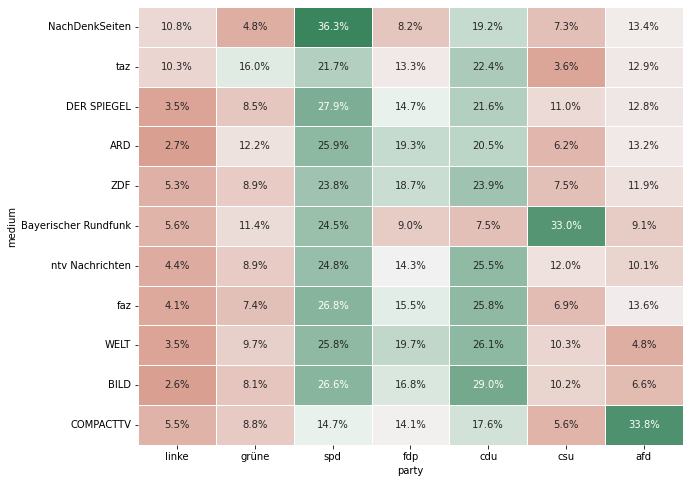

In [39]:
e_heatmap_plot_df(proportion_party_mentions_by_party_df)

In [40]:
deviations_party_mentions_by_party_df = d_subtract_df_column_means(proportion_party_mentions_by_party_df)
deviations_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.054919,-0.046637,0.109626,-0.066732,-0.025634,-0.029998,0.004456
taz,0.049645,0.064504,-0.036794,-0.016127,0.006809,-0.067681,-0.000355
DER SPIEGEL,-0.018252,-0.009803,0.025532,-0.001566,-0.001514,0.006806,-0.001203
ARD,-0.026307,0.026474,0.006026,0.044309,-0.012603,-0.040890,0.002992
ZDF,-0.000082,-0.005829,-0.015219,0.038312,0.021494,-0.028429,-0.010247
Bayerischer Rundfunk,0.003357,0.018493,-0.008660,-0.059076,-0.142510,0.226391,-0.037995
ntv Nachrichten,-0.008491,-0.006491,-0.005325,-0.005854,0.037528,0.017057,-0.028424
faz,-0.012167,-0.021057,0.014184,0.006594,0.040324,-0.034665,0.006788
WELT,-0.017946,0.001842,0.004302,0.048704,0.044194,-0.000148,-0.080947


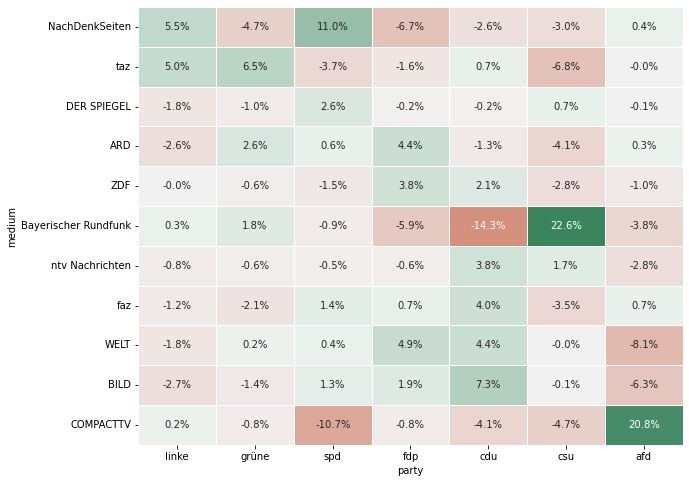

In [41]:
e_heatmap_plot_df(deviations_party_mentions_by_party_df)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_38724/757681360.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_38724/757681360.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


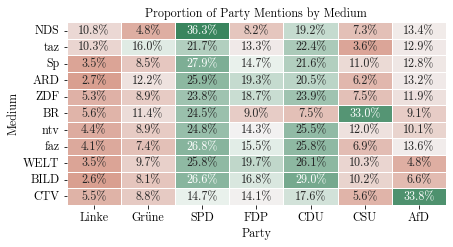

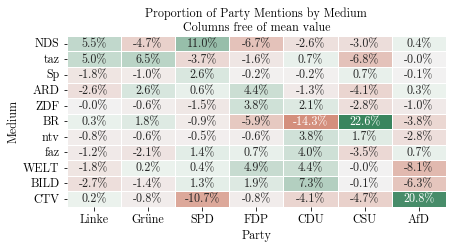

In [55]:
f_saveplot_mentions_short(df=proportion_party_mentions_by_party_df, title='Proportion of Party Mentions by Medium', path='../results/englisch/erwähnungen_partei_gekuerzt.pdf')
f_saveplot_mentions_short(df=deviations_party_mentions_by_party_df, title='Proportion of Party Mentions by Medium\nColumns free of mean value', path='../results/englisch/erwähnungen_partei_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=2)